In [100]:
import preprocessing as prep
import statsmodels
import numpy as np
import pandas as pd
import datetime
from pandas import Series, DataFrame
import helper as hlp
import matplotlib.pyplot as plt
from bb_binary import FrameContainer, Repository, load_frame_container
from collections import namedtuple
import seaborn as sns

In [10]:
%matplotlib inline

In [13]:
path = "../00_Data/testset_2015_20m/2015082215/"
path = "../00_Data/testset_2015_20m/2015092215/"
path = "../00_Data/testset_2015_20m/2015102215/"

In [14]:
files = hlp.get_files(path)

In [17]:
tfile = files[0]

In [18]:
tfile

array([ '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_3_2015-10-22T15:19:13.826157Z--2015-10-22T15:24:54.840662Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_1_2015-10-22T15:19:15.567256Z--2015-10-22T15:24:56.583761Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_2_2015-10-22T15:19:17.353358Z--2015-10-22T15:24:58.370863Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015102215/2015/10/22/15/20/Cam_0_2015-10-22T15:19:17.862387Z--2015-10-22T15:24:58.880892Z.bbb'], 
      dtype='<U150')

In [8]:
df3 = prep.get_dataframe2(load_frame_container(tfile[0]))
df0 = prep.get_dataframe2(load_frame_container(tfile[1]))
df2 = prep.get_dataframe2(load_frame_container(tfile[2]))
df1 = prep.get_dataframe2(load_frame_container(tfile[3]))

In [9]:
c = 0.95

In [10]:
df3 = prep.calcIds(df3,c)
df0 = prep.calcIds(df0,c)
df2 = prep.calcIds(df2,c)
df1 = prep.calcIds(df1,c)

In [11]:
# cam 0 und cam1 nach rechts verschieben
df0.xpos = df0.xpos + 3000
df1.xpos = df1.xpos + 3000

In [12]:
# Seiten zusammenfugen
side0 = pd.concat([df3, df0])
side1 = pd.concat([df2, df1])

In [37]:
def coloring(value):
    retval = 'k'
    if(value.dup):
        retval = 'r'    
    return retval

In [38]:
def plotSides(frame, s):
    s = s[s.frame_idx == frame]
    s = s.assign(dup=s.duplicated('id', keep=False))
    s = s.assign(color=s.apply(coloring, axis=1))
    axes = s.plot.scatter(x='xpos',
                          y='ypos',
                          xlim=(0,6000),
                          ylim=(0,4000),
                          s=20,
                          c=s.color,
                          alpha=0.5)
    axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

# Plot einer Wabenseite (Duplikate in Rot) pro Frame

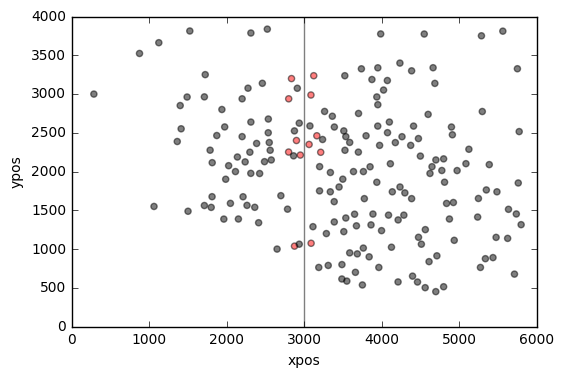

In [56]:
plotSides(28,side0)

# Duplikate Heatmap pro Seite

In [113]:
gr = side1.groupby(by='frame_idx')

dup = []
for name, group in gr:
    dup.append(group[group.duplicated('id', keep=False)])

data = pd.concat(dup)

axes = data.plot.scatter(x='xpos',
                          y='ypos',
                          xlim=(0,6000),
                          ylim=(0,4000),
                          s=10,
                         c = 'k',
                          alpha=0.1)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)
axes.set_title("Duplikate: Cam1 & Cam2")
axes.set_xlabel("x")
axes.set_ylabel("y")

# Zeitversatz cam 1 und 2

In [6]:
files

array([[ '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_3_2015-08-22T15:15:24.110584Z--2015-08-22T15:21:05.125089Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_0_2015-08-22T15:15:25.693675Z--2015-08-22T15:21:06.709181Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_2_2015-08-22T15:15:25.809681Z--2015-08-22T15:21:06.827187Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_1_2015-08-22T15:15:48.997008Z--2015-08-22T15:21:30.012512Z.bbb'],
       [ '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_3_2015-08-22T15:21:05.458108Z--2015-08-22T15:26:46.471613Z.bbb',
        '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_0_2015-08-22T15:21:07.042200Z--2015-08-22T15:26:48.057704Z.bbb',
        '/Users/alexa/Pro

In [193]:
tfile = files[1]
fc3 = load_frame_container(tfile[0])
fc0 = load_frame_container(tfile[1])
fc2 = load_frame_container(tfile[2])
fc1 = load_frame_container(tfile[3])

In [202]:
fc2.fromTimestamp - fc1.fromTimestamp

-23.18432593345642

In [203]:
fc3.fromTimestamp - fc0.fromTimestamp

-1.5840911865234375

In [204]:
fc3.fromTimestamp - fc2.fromTimestamp

-1.7030971050262451

In [205]:
fc3.fromTimestamp - fc1.fromTimestamp

-24.887423038482666

In [206]:
fc0.fromTimestamp - fc2.fromTimestamp

-0.11900591850280762

In [207]:
fc0.fromTimestamp - fc1.fromTimestamp

-23.30333185195923

In [208]:
list(fc2.frames

# Größe des Überlappungsbereiches

In [43]:
pall = "/mnt/data/all/"

In [57]:
Detection = namedtuple(
    'Detection',
    ['idx', 'xpos', 'ypos', 'radius', 'zRotation', 'decodedId', 'frame_idx', 'timestamp', 'cam_id', 'fc_id', 'myid']
)

In [58]:
def defData(repoall, m, d, h, minutes):
    
    # FROM - TO festlegen
    begin = "2015-{}-{}T{}:00:00Z".format(m,d,h) # %Y-%m-%dT%H:%M:%SZ
    begin_ts = datetime.datetime.timestamp(datetime.datetime.strptime(begin, "%Y-%m-%dT%H:%M:%SZ"))
    end_ts = begin_ts + minutes*60

    parts = [None, None, None, None]

    # Get Frames for each cam
    for i in list(range(4)):

        tmp = []
        myid = 0
        for f, fc in repoall.iter_frames(begin=begin_ts, end=end_ts, cam=i):
            for d in f.detectionsUnion.detectionsDP:
                d = Detection(d.idx, d.xpos, d.ypos, d.radius, d.zRotation, list(d.decodedId), f.frameIdx, f.timestamp, fc.camId, fc.id, myid)
                tmp.append(d)
            myid += 1

        parts[i] = DataFrame(tmp)
    
    return parts

In [59]:
data = defData(repoall, "08", "21", "00", 10)

In [63]:
c = 0.95

In [64]:
data[0] = prep.calcIds(data[0],c)
data[1] = prep.calcIds(data[1],c)
data[2] = prep.calcIds(data[2],c)
data[3] = prep.calcIds(data[3],c)

In [65]:
data[3].head()

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,myid,confidence,id
0,0,111,1411,22.703243,2.998742,1006,1.440115e+09,3,12815578036105162992,0,1.000000,3098
1,1,122,2225,23.025755,2.687282,1006,1.440115e+09,3,12815578036105162992,0,1.000000,3705
2,2,289,2174,23.191965,-0.629438,1006,1.440115e+09,3,12815578036105162992,0,1.000000,2102
3,3,337,812,22.530586,1.443329,1006,1.440115e+09,3,12815578036105162992,0,1.000000,2180
4,4,424,3813,22.780859,2.307447,1006,1.440115e+09,3,12815578036105162992,0,0.952941,3671


In [66]:
# cam 0 und cam1 nach rechts verschieben
data[0].xpos = data[0].xpos + 3000
data[1].xpos = data[1].xpos + 3000

In [67]:
# Seiten zusammenfugen
s0 = pd.concat([data[3], data[0]])
s1 = pd.concat([data[2], data[1]])

In [124]:
def plotSides(side, cam1, cam2):
    grs = side.groupby(by='myid')

    dup = []
    for name, group in grs:
        dup.append(group[group.duplicated('id', keep=False)])

    data_plot = pd.concat(dup)

    axes = data_plot.plot.scatter(x='xpos',
                              y='ypos',
                              xlim=(0,6000),
                              ylim=(0,4000),
                              s=10,
                             c = 'k',
                              alpha=0.1)
    axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)
    axes.set_title("Duplikate: Cam{} & Cam{} \n 21.08. 00:00-00:10 Uhr".format(cam1,cam2))
    axes.set_xlabel("x")
    axes.set_ylabel("y")

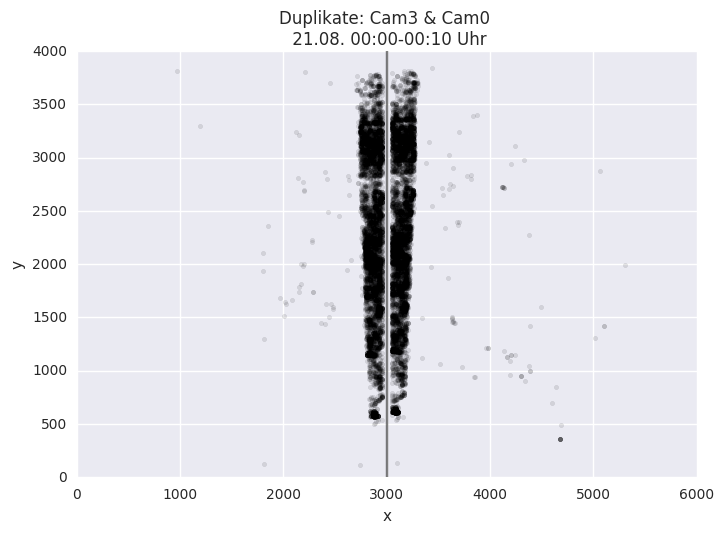

In [125]:
plotSides(s0, 3,0)

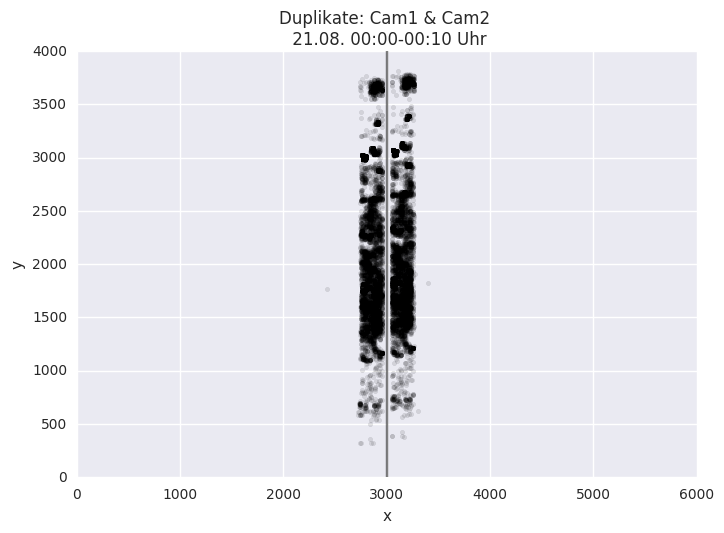

In [167]:
plotSides(s1, 1,2)

# Wie groß ist der Bereich

In [132]:
def getXValues(data):
    
    grs = data.groupby(by='myid')

    dup = []
    for name, group in grs:
        dup.append(group[group.duplicated('id', keep=False)])

    data_plot = pd.concat(dup)
    return data_plot.xpos

## Side 3/0

In [137]:
d = getXValues(s0)

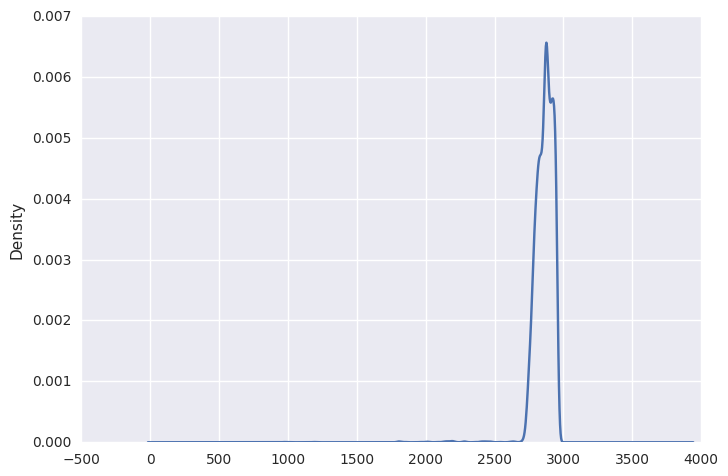

In [139]:
d[d<3000].plot.density()

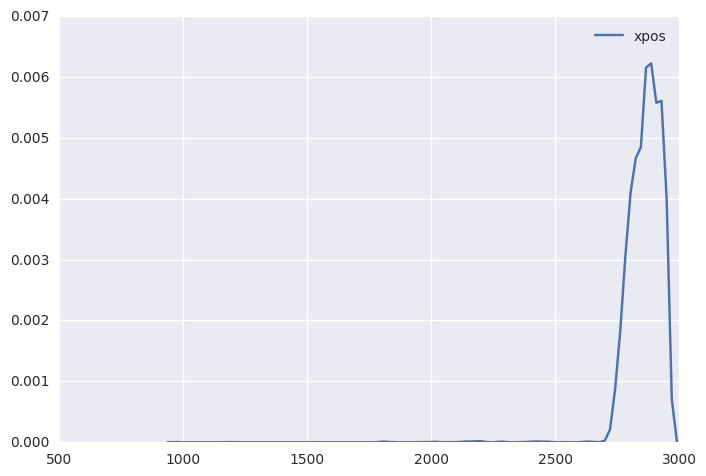

In [141]:
sns.kdeplot(d[d< 3000])

In [150]:
np.percentile(d[d<3000], q=5)-3000

-236.0

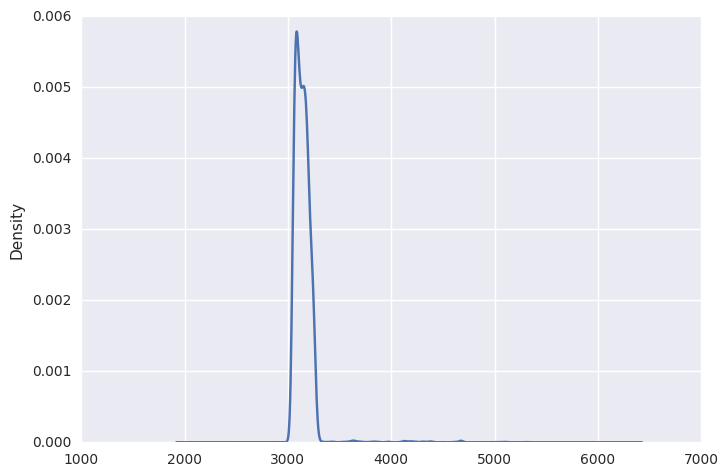

In [151]:
d[d>3000].plot.density()

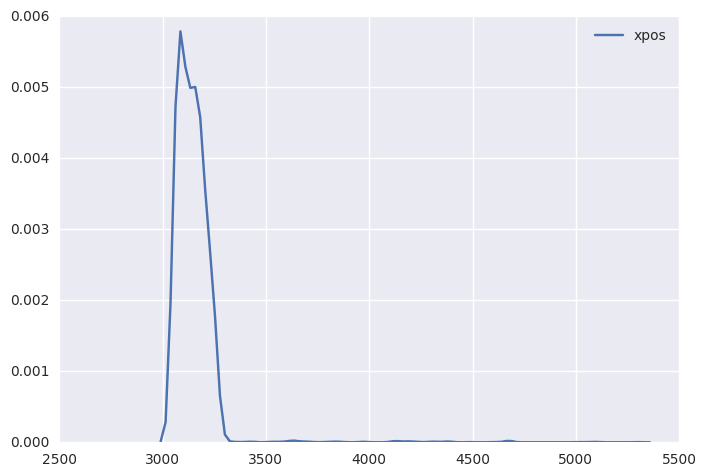

In [152]:
sns.kdeplot(d[d> 3000])

In [160]:
np.percentile(d[d>3000], q=95)-3000

250.0

## Side 1/2

In [161]:
d2 = getXValues(s1)

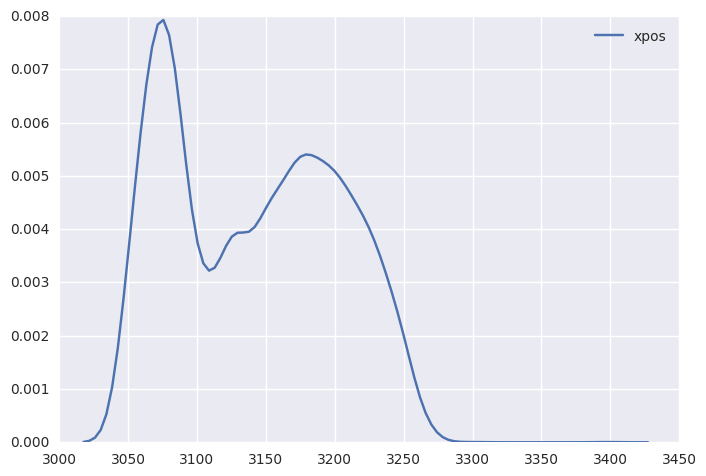

In [162]:
sns.kdeplot(d2[d2> 3000])

In [172]:
np.percentile(d2[d2>3000], q=95)-3000

238.0

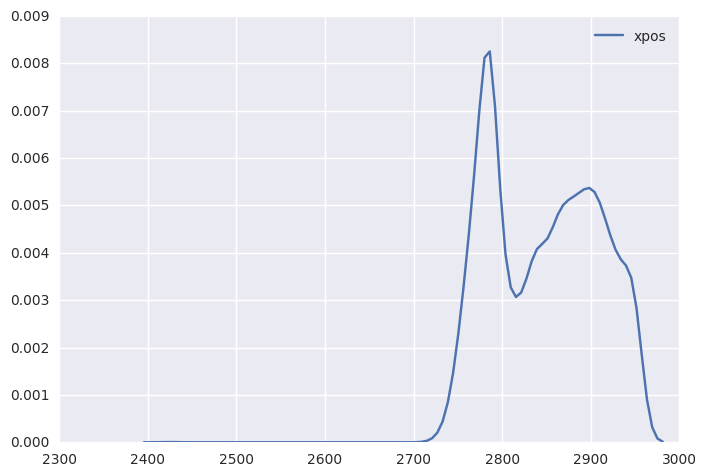

In [173]:
sns.kdeplot(d2[d2< 3000])

In [174]:
np.percentile(d2[d2<3000], q=5)-3000

-238.0

In [177]:
12.5*24*50/60/60

4.166666666666667

# OLD STUFF

In [336]:
s00 = side0[side0.frame_idx == 250]
s10 = side1[side1.frame_idx == 250]

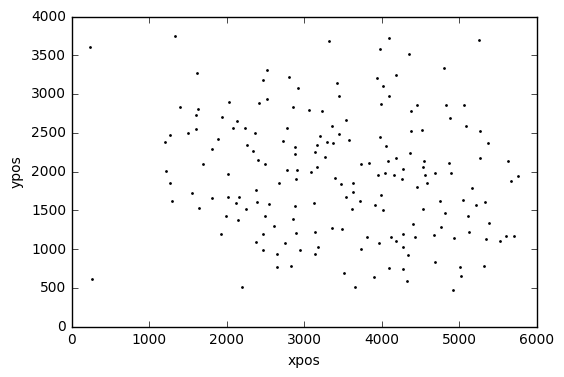

In [337]:
s00.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=1)

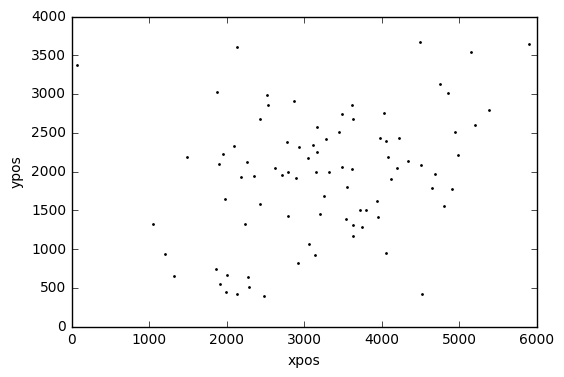

In [338]:
s10.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=1)

In [339]:
s10['dupf'] = s10.duplicated('id', keep=False)
s00['dupf'] = s00.duplicated('id', keep=False)
s10['dupl'] = s10.duplicated('id', keep=False)
s00['dupl'] = s00.duplicated('id', keep=False)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [340]:
def f(value):
    retval = 'k'
    if(value.dupf):
        retval = 'r'
    if(value.dupl):
        retval = 'r'
    
    return retval
    

In [341]:
s10['color'] = s10.apply(f, axis=1)
s00['color'] = s00.apply(f, axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


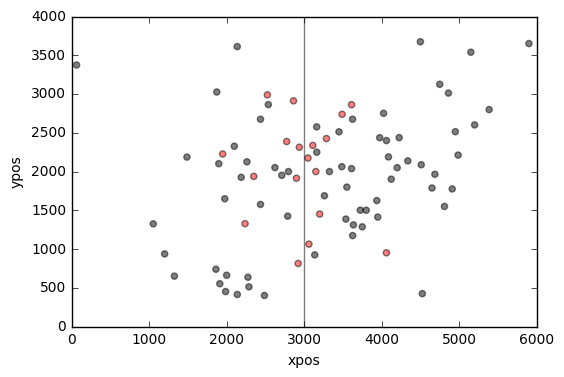

In [342]:
axes = s10.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=20, c=s10.color, alpha=0.5)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

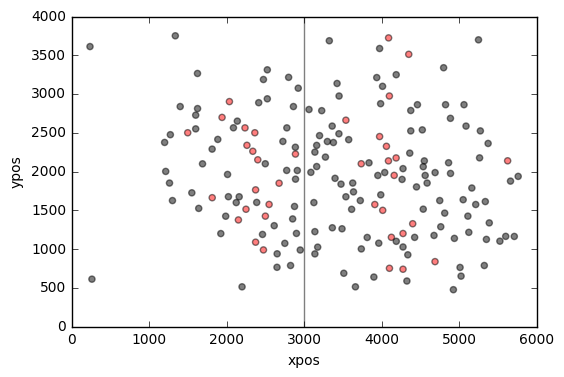

In [343]:
axes = s00.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=20, c=s10.color, alpha=0.5)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

In [324]:
s = DataFrame([1,2,3,4,5,1,2,3,1,2])

In [325]:
s['dup'] = s.duplicated(keep='last')

In [326]:
s

,0,dup
0,1,True
1,2,True
2,3,True
3,4,False
4,5,False
5,1,True
6,2,True
7,3,False
8,1,False
9,2,False


In [130]:
a = [3,4,5,6]
b = [100,200,300]

In [131]:
list(zip(a,b))

[(3, 100), (4, 200), (5, 300)]

In [132]:
import itertools

In [136]:
l = list(itertools.product(a,b))

In [169]:
d = {item:[] for item in l}

In [170]:
d

{(3, 100): [],
 (3, 200): [],
 (3, 300): [],
 (4, 100): [],
 (4, 200): [],
 (4, 300): [],
 (5, 100): [],
 (5, 200): [],
 (5, 300): [],
 (6, 100): [],
 (6, 200): [],
 (6, 300): []}

In [140]:
for i,j in l:
    print(i)

3
3
3
4
4
4
5
5
5
6
6
6


In [182]:
dd = {(1,1):[], (1,2):[], (1,3):[]}

In [183]:
results = [(1,1,[6,6,6]),(1,2,[1,2,3]),(1,3,[5,5,5]),(1,1,[2,2])]

In [184]:
for d,i,r in results:
    dd[(d,i)].extend(r)

In [185]:
dd

{(1, 1): [6, 6, 6, 2, 2], (1, 2): [1, 2, 3], (1, 3): [5, 5, 5]}

In [192]:
for i,d in dd:
    print(dd[(i,d)])

[6, 6, 6, 2, 2]
[1, 2, 3]
[5, 5, 5]


In [3]:
str('sdf').zfill(5)

'00sdf'

In [7]:
12*24/60

4.8